# imports

In [274]:
from rdkit import Chem
from rdkit.Chem import rdFMCS
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw, rdDepictor
from PIL import Image
import io
from pathlib import Path

In [275]:
fig_path = Path("20250811_scaffold_figures")
fig_path.mkdir(exist_ok=True)

In [276]:
df = pd.read_csv("ligand_scaffold_data.csv")

In [277]:
ss = df.groupby("scaffold_orig_id").head(1)

In [278]:
len(ss)

137

In [279]:
top20 = ss.sort_values("scaffold_count", ascending=False).head(20)

In [280]:
top20.sort_values("scaffold_orig_id", inplace=True)

In [281]:
scaffold_list = [(f"Scaffold {scaffold_id}", Chem.MolFromSmiles(smiles)) for scaffold_id, smiles in 
                 zip(top20["scaffold_orig_id"], top20["scaffold_smarts"])]

In [282]:
scaffold_list

[('Scaffold 1', <rdkit.Chem.rdchem.Mol at 0x15a46d310>),
 ('Scaffold 2', <rdkit.Chem.rdchem.Mol at 0x15a46d380>),
 ('Scaffold 3', <rdkit.Chem.rdchem.Mol at 0x15a46d3f0>),
 ('Scaffold 4', <rdkit.Chem.rdchem.Mol at 0x15a46d460>),
 ('Scaffold 5', <rdkit.Chem.rdchem.Mol at 0x15a46d4d0>),
 ('Scaffold 6', <rdkit.Chem.rdchem.Mol at 0x15a46d540>),
 ('Scaffold 8', <rdkit.Chem.rdchem.Mol at 0x15a46d5b0>),
 ('Scaffold 10', <rdkit.Chem.rdchem.Mol at 0x15a46d620>),
 ('Scaffold 11', <rdkit.Chem.rdchem.Mol at 0x15a46d690>),
 ('Scaffold 12', <rdkit.Chem.rdchem.Mol at 0x15a46d700>),
 ('Scaffold 14', <rdkit.Chem.rdchem.Mol at 0x15a46d770>),
 ('Scaffold 17', <rdkit.Chem.rdchem.Mol at 0x15a46d7e0>),
 ('Scaffold 18', <rdkit.Chem.rdchem.Mol at 0x15a46d850>),
 ('Scaffold 19', <rdkit.Chem.rdchem.Mol at 0x15a46d8c0>),
 ('Scaffold 20', <rdkit.Chem.rdchem.Mol at 0x15a46d930>),
 ('Scaffold 22', <rdkit.Chem.rdchem.Mol at 0x15a46d9a0>),
 ('Scaffold 23', <rdkit.Chem.rdchem.Mol at 0x15a46da10>),
 ('Scaffold 24', <rdk

In [283]:
from rdkit import Chem
from rdkit.Chem import Draw, rdDepictor
from PIL import Image
import io
# import cairosvg  # For SVG → PNG/PDF conversion

def draw_scaffolds(
    scaffold_list: list[(str, Chem.Mol)],
    first_n=-1,
    mols_per_row=-1,
    use_svg=False,
    save_pdf=False,
    out_file=None
):
    scaffold_rdmols = [Chem.RemoveHs(mol[1]) for mol in scaffold_list]

    # Set Draw Options
    dopts = Draw.rdMolDraw2D.MolDrawOptions()
    dopts.setHighlightColour((68 / 256, 178 / 256, 212 / 256))
    dopts.highlightBondWidthMultiplier = 16

    # Compute 2D coords
    for mol in scaffold_rdmols[:first_n]:
        rdDepictor.Compute2DCoords(mol)
        rdDepictor.StraightenDepiction(mol)

    # Create grid image
    img = Draw.MolsToGridImage(
        scaffold_rdmols[:first_n],
        molsPerRow=mols_per_row,
        subImgSize=(200, 200),
        useSVG=use_svg,
        legends=[mol[0] for mol in scaffold_list[:first_n]],
        drawOptions=dopts,
    )

    # Save to PDF if requested
    if save_pdf and out_file:
        if use_svg:
            # img is a string of SVG
            # png_bytes = cairosvg.svg2png(bytestring=img.encode("utf-8"))
            # pil_img = Image.open(io.BytesIO(png_bytes))
            raise NotImplementedError("SVG to PDF conversion not implemented in this example.")
        else:
            # img is an IPython Image object → get PNG bytes
            pil_img = Image.open(io.BytesIO(img.data))

        pil_img.save(fig_path / out_file, "PDF")

    return img


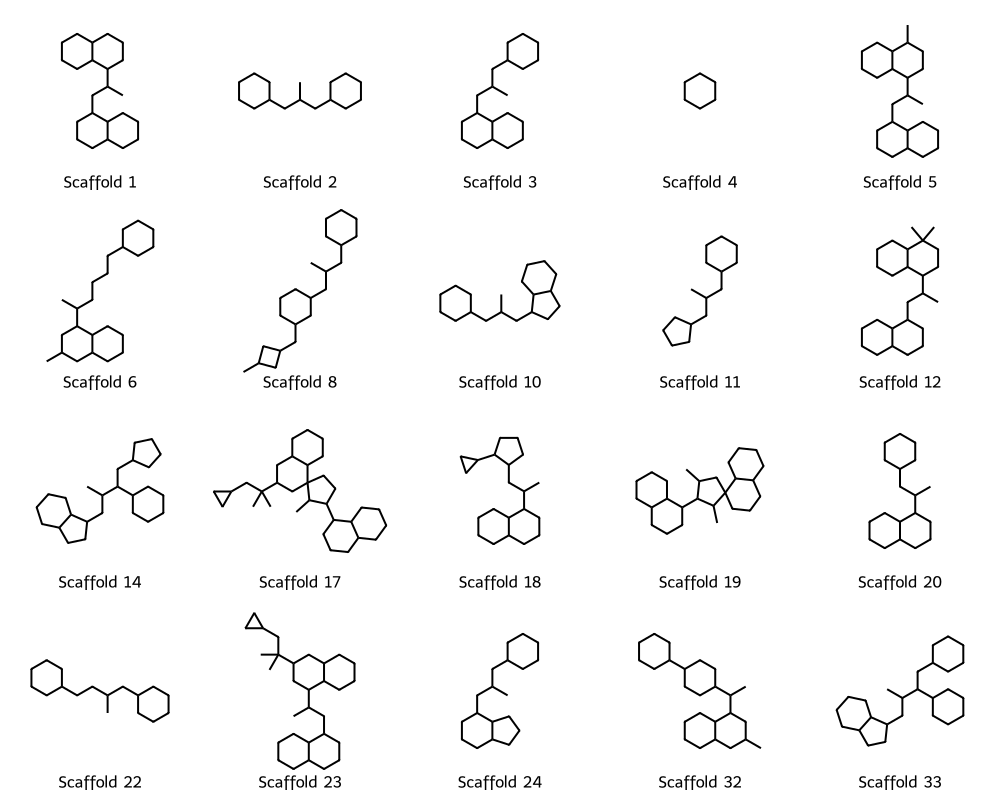

In [284]:
draw_scaffolds(
    scaffold_list,
    first_n=20,
    mols_per_row=5,
    use_svg=False,  # PNG route is simpler for PDF
    save_pdf=True,
    out_file="top20_scaffolds.pdf"
)


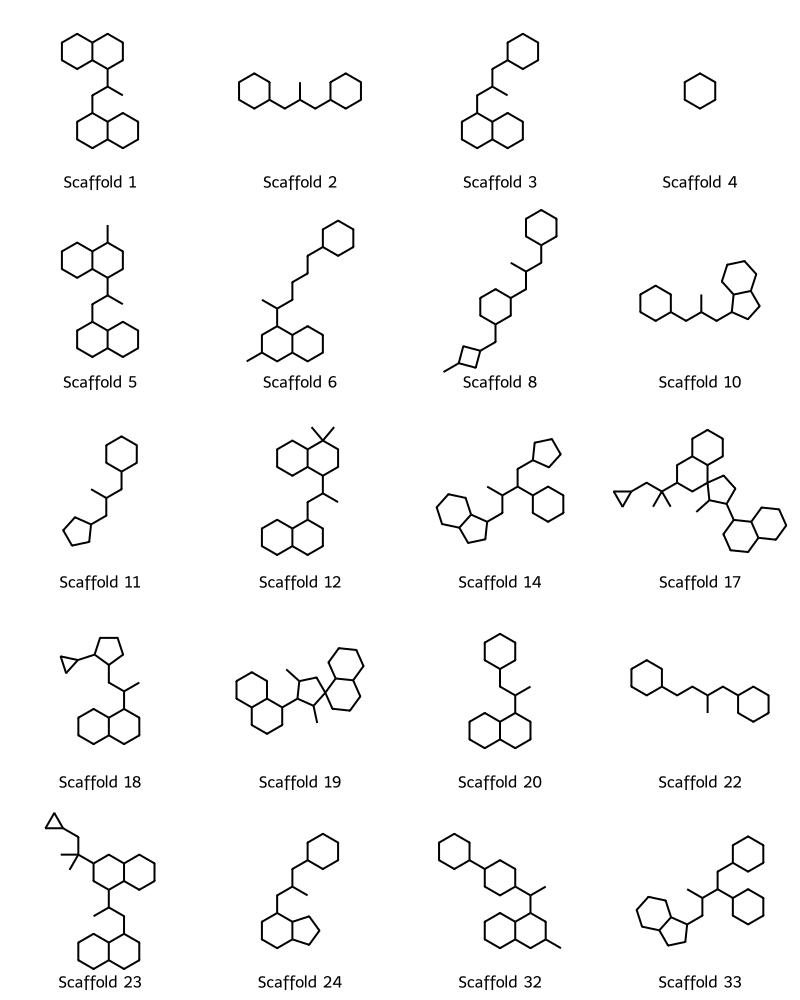

In [285]:
draw_scaffolds(
    scaffold_list,
    first_n=20,
    mols_per_row=4,
    use_svg=False,  # PNG route is simpler for PDF
    save_pdf=True,
    out_file="top20_scaffolds_5x4.pdf"
)

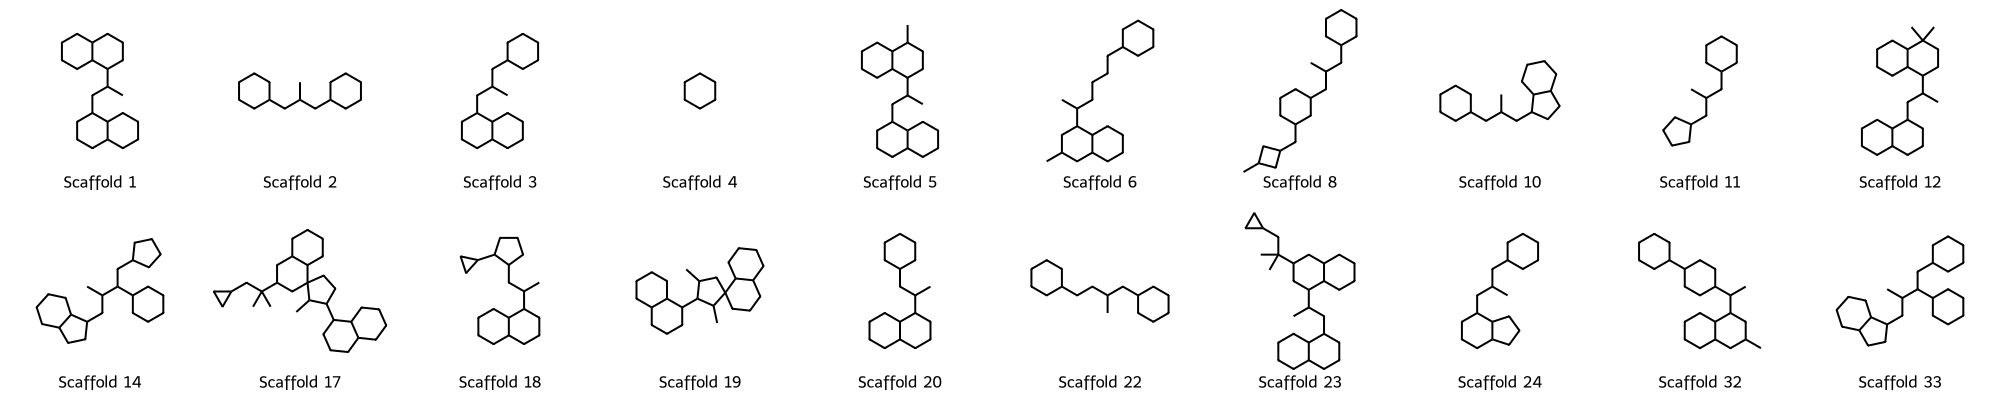

In [286]:
draw_scaffolds(
    scaffold_list,
    first_n=20,
    mols_per_row=10,
    use_svg=False,  # PNG route is simpler for PDF
    save_pdf=True,
    out_file="top20_scaffolds_2x10.pdf"
)

# Make a figure with an example of each scaffold

In [287]:
df

,index,compound_name,scaffold_orig_id,compound_date,scaffold_smarts,smiles,scaffold_count,scaffold_first_date,scaffold_smarts_from_scaff_data
0,0,MAT-POS-c9973a83-1,2,2020-08-04 15:19:35,CC(CC1CCCCC1)CC1CCCCC1,Cc1ccncc1NC(=O)Cc2cc(cc(c2)Cl)OC,58,2020-02-27 01:46:57,CC(CC1CCCCC1)CC1CCCCC1
1,1,JAN-GHE-83b26c96-15,2,2020-07-10 04:24:26,CC(CC1CCCCC1)CC1CCCCC1,Cc1ccncc1N(C)C(=O)Cc2cccc(c2)Cl,58,2020-02-27 01:46:57,CC(CC1CCCCC1)CC1CCCCC1
2,2,JAG-UCB-a3ef7265-3,134,2020-06-11 16:59:39,CC(CC1CCCCC1)C1CCC2CCCCC21,c1cc2c(cc1Cl)[C@@H](CO2)C(=O)Nc3cnccc3CO,1,2020-06-11 16:59:39,CC(CC1CCCCC1)C1CCC2CCCCC21
3,3,AAR-POS-d2a4d1df-6,52,2020-02-26 13:14:49,CC(CCC1CCCCC1)C1CCCCC1,Cc1ccc(cc1)OCC(=O)N2CC[NH+](CC2)C,2,2020-02-26 13:14:49,CC(CCC1CCCCC1)C1CCCCC1
4,4,AAR-POS-d2a4d1df-10,65,2020-02-27 08:42:31,CC(CCCC1CCCCC1)C1CCCCC1,c1ccc(c(c1)C(=O)NCCc2ccncc2)F,1,2020-02-27 08:42:31,CC(CCCC1CCCCC1)C1CCCCC1
...,...,...,...,...,...,...,...,...,...
398,398,EDJ-MED-976a33d5-1,146,2022-01-19 19:27:19,CC1C(C2CC2)CC2(CCC(C3CCCC4CCCCC43)C2C)C2CCCCC12,CNC(=O)C1(CC1)N2C[C@]3(CCN(C3=O)c4cncc5c4cccc5...,1,2022-01-19 19:27:19,CC1C(C2CC2)CC2(CCC(C3CCCC4CCCCC43)C2C)C2CCCCC12
399,399,ALP-POS-ecbed2ba-12,111,2022-01-19 19:55:19,CC(CCC1CC1)CC1CC2CCCCC2C2(CCC(C3CCCC4CCCCC43)C...,c1ccc2c(c1)cncc2N3CC[C@@]4(C3=O)C[N@H+](Cc5c4c...,1,2022-01-19 19:55:19,CC(CCC1CC1)CC1CC2CCCCC2C2(CCC(C3CCCC4CCCCC43)C...
400,400,MAT-POS-50a80394-1,17,2022-02-05 04:11:10,CC1C(C2CCCC3CCCCC32)CCC12CC(C(C)(C)CC1CC1)CC1C...,C[C@H]1CN(C(=O)[C@@]12C[N@](Cc3c2cc(cc3)Cl)S(=...,4,2021-10-07 20:44:02,CC1C(C2CCCC3CCCCC32)CCC12CC(C(C)(C)CC1CC1)CC1C...
401,401,ALP-POS-133e7cd9-2,110,2022-02-05 05:01:48,CC1C(C2CCCC3CCCCC32)CCCC12CC(C(C)(C)CC1CC1)CC1...,c1ccc2c(c1)cncc2N3CCC[C@@]4(C3=O)C[N@@](Cc5c4c...,1,2022-02-05 05:01:48,CC1C(C2CCCC3CCCCC32)CCCC12CC(C(C)(C)CC1CC1)CC1...


In [288]:
def get_example_mols_for_scaffold_id(scaffold_id: int):
    example_dict = df[df["scaffold_orig_id"] == scaffold_id].head(1).to_dict(orient="records")[0]
    example_name = example_dict["compound_name"]
    example_smiles = example_dict["smiles"]
    example_mol = Chem.MolFromSmiles(example_smiles)
    return example_name, example_mol
def get_example_mols_for_scaffold_list(scaffold_list):
    examples = []
    for scaffold in scaffold_list:
        scaffold_id = int(scaffold[0].split()[-1])
        example = get_example_mols_for_scaffold_id(scaffold_id)
        examples.append(example)
    return examples

In [289]:
examples = get_example_mols_for_scaffold_list(scaffold_list)

In [290]:
def zip_lists_n_rows(l1, l2, n_columns=10):
    if not len(l1) == len(l2):
        raise ValueError("Both lists must have the same length")
    # take the first n_columns from each list
    zipped = []
    for row in range(0, len(l1), n_columns):
        zipped.extend(l1[row:row + n_columns])
        zipped.extend(l2[row:row + n_columns])
    return zipped

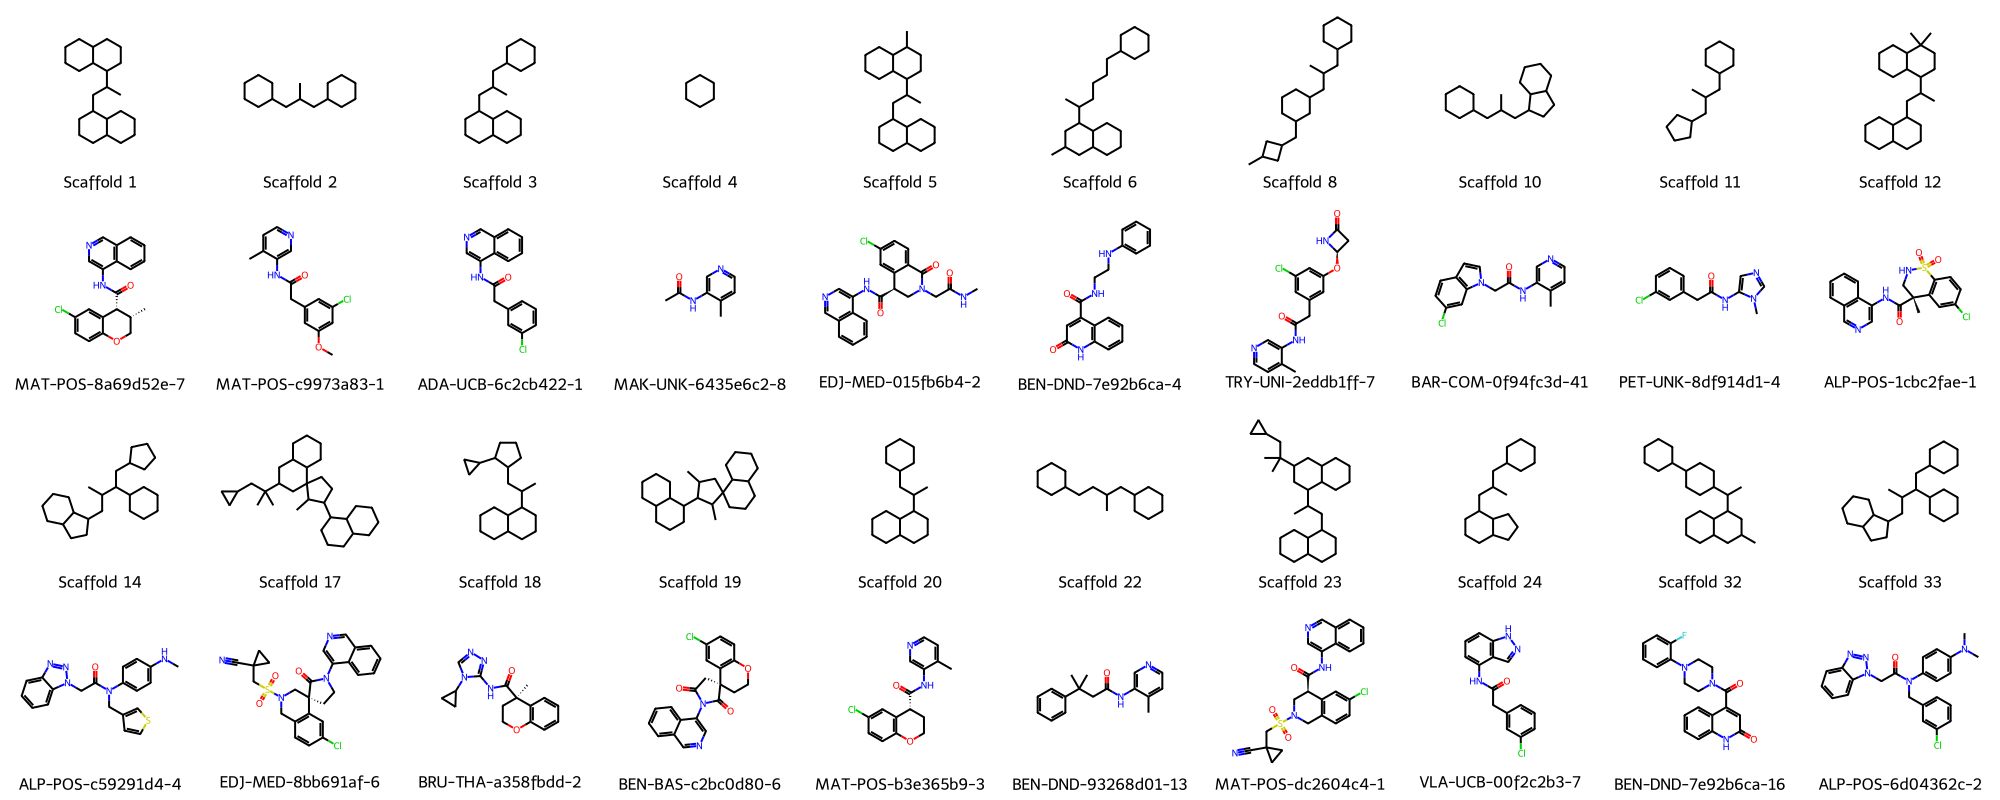

In [291]:
zipped = list(zip_lists_n_rows(scaffold_list, examples, n_columns=10))
draw_scaffolds(
    zipped,
    first_n=40,
    mols_per_row=10,
    use_svg=False,  # PNG route is simpler for PDF
    save_pdf=True,
    out_file="top20_scaffolds_2x10_with_examples.pdf"
)

In [292]:
example_list_of_lists = [[ex] for ex in examples]

In [293]:
s1 = scaffold_list[0]

In [294]:
ex1 = examples[0]

In [295]:
ex1_mol = ex1[1]
s1_mol = s1[1]

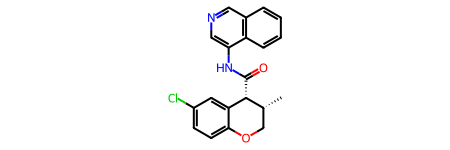

In [296]:
ex1_mol


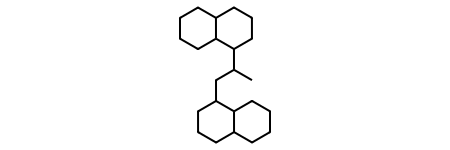

In [297]:
s1_mol

## figure out how to get a match

In [298]:
mcs = rdFMCS.FindMCS([s1_mol, ex1_mol], 
                                           atomCompare=rdFMCS.AtomCompare.CompareAny,
                                           bondCompare=rdFMCS.BondCompare.CompareAny,
                                           ringMatchesRingOnly=True)

In [299]:
mcs_mol = Chem.MolFromSmarts(mcs.smartsString)

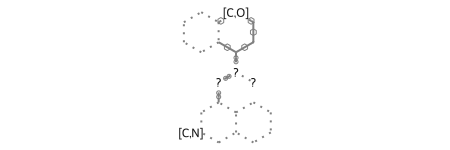

In [300]:
mcs_mol

In [301]:
## generate depiction of scaffold
rdDepictor.Compute2DCoords(s1_mol)
rdDepictor.StraightenDepiction(s1_mol)

In [302]:
## align example to scaffold using the MCS as reference
alignment_map = rdDepictor.GenerateDepictionMatching2DStructure(
    ex1_mol, s1_mol, acceptFailure=True, refPatt=mcs_mol
)

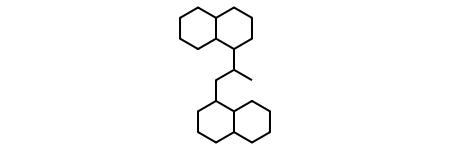

In [303]:
s1_mol

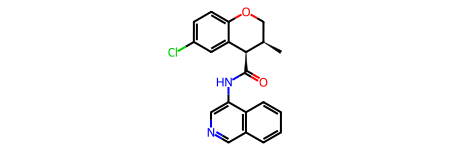

In [304]:
ex1_mol

In [311]:
def draw_scaffolds(
    scaffold_list: list[(str, Chem.Mol)],
    example_list: list[(str, Chem.Mol)] = None,
    first_n=-1,
    mols_per_row=5,
    use_svg=False,
    save_pdf=False,
    out_file=None,
    vertical_examples=False,
):
    scaffold_rdmols = [Chem.RemoveHs(mol[1]) for mol in scaffold_list]
    
    if example_list:
        example_rdmols = [Chem.RemoveHs(mol[1]) for mol in example_list]

    # Set Draw Options
    dopts = Draw.rdMolDraw2D.MolDrawOptions()
    dopts.setHighlightColour((68 / 256, 178 / 256, 212 / 256))
    dopts.highlightBondWidthMultiplier = 16

    # Compute 2D coords
    for mol in scaffold_rdmols[:first_n]:
        rdDepictor.Compute2DCoords(mol)
        rdDepictor.StraightenDepiction(mol)
    
    # align examples to scaffolds
    if example_list:
        for i, mol in enumerate(example_rdmols[:first_n]):
            ex1_mol = mol
            s1_mol = scaffold_rdmols[i]
            try:
                mcs = rdFMCS.FindMCS([s1_mol, ex1_mol], 
                                           atomCompare=rdFMCS.AtomCompare.CompareAny,
                                           bondCompare=rdFMCS.BondCompare.CompareAny,
                                           ringMatchesRingOnly=True)
                mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
                alignment_map = rdDepictor.GenerateDepictionMatching2DStructure(ex1_mol, s1_mol, acceptFailure=True, refPatt=mcs_mol)
                # not sure exactly what this does but it seems to keep any of the atom coordinates from overlapping
                rdDepictor.SetPreferCoordGen(True)
                rdDepictor.StraightenDepiction(ex1_mol)
            except Exception as e:
                print(f"Alignment failed for example {i}: {e}")
                rdDepictor.Compute2DCoords(mol)
                rdDepictor.StraightenDepiction(mol)
    
    if vertical_examples:
        combined_rdmols = []
        combined_legends = []
        scaffold_legends = [mol[0] for mol in scaffold_list]
        example_legends = [mol[0] for mol in example_list] if example_list else []
        for row in range(0, len(scaffold_rdmols), mols_per_row):
            combined_rdmols.extend(scaffold_rdmols[row:row + mols_per_row])
            combined_rdmols.extend(example_rdmols[row:row + mols_per_row])
            
            combined_legends.extend(scaffold_legends[row:row + mols_per_row])
            combined_legends.extend(example_legends[row:row + mols_per_row])
    else:
        combined_rdmols = [mol for mols in zip(scaffold_rdmols, example_rdmols) for mol in mols] if example_list else scaffold_rdmols
        mols_per_row = mols_per_row * 2  # Each scaffold + example counts as 2
        
        scaffold_legends = [mol[0] for mol in scaffold_list]
        example_legends = [mol[0] for mol in example_list] if example_list else []
        combined_legends = [legend for legends in zip(scaffold_legends, example_legends) for legend in legends] if example_list else scaffold_legends
    
    print(f"Drawing {len(combined_rdmols)} molecules with {mols_per_row} per row...")

    # Create grid image
    img = Draw.MolsToGridImage(
        combined_rdmols,
        molsPerRow=mols_per_row,
        subImgSize=(200, 200),
        useSVG=use_svg,
        legends=combined_legends,
        drawOptions=dopts,
    )

    # Save to PDF if requested
    if save_pdf and out_file:
        if use_svg:
            # img is a string of SVG
            # png_bytes = cairosvg.svg2png(bytestring=img.encode("utf-8"))
            # pil_img = Image.open(io.BytesIO(png_bytes))
            raise NotImplementedError("SVG to PDF conversion not implemented in this example.")
        else:
            # img is an IPython Image object → get PNG bytes
            pil_img = Image.open(io.BytesIO(img.data))

        pil_img.save(fig_path / out_file, "PDF")

    return img

Drawing 40 molecules with 8 per row...


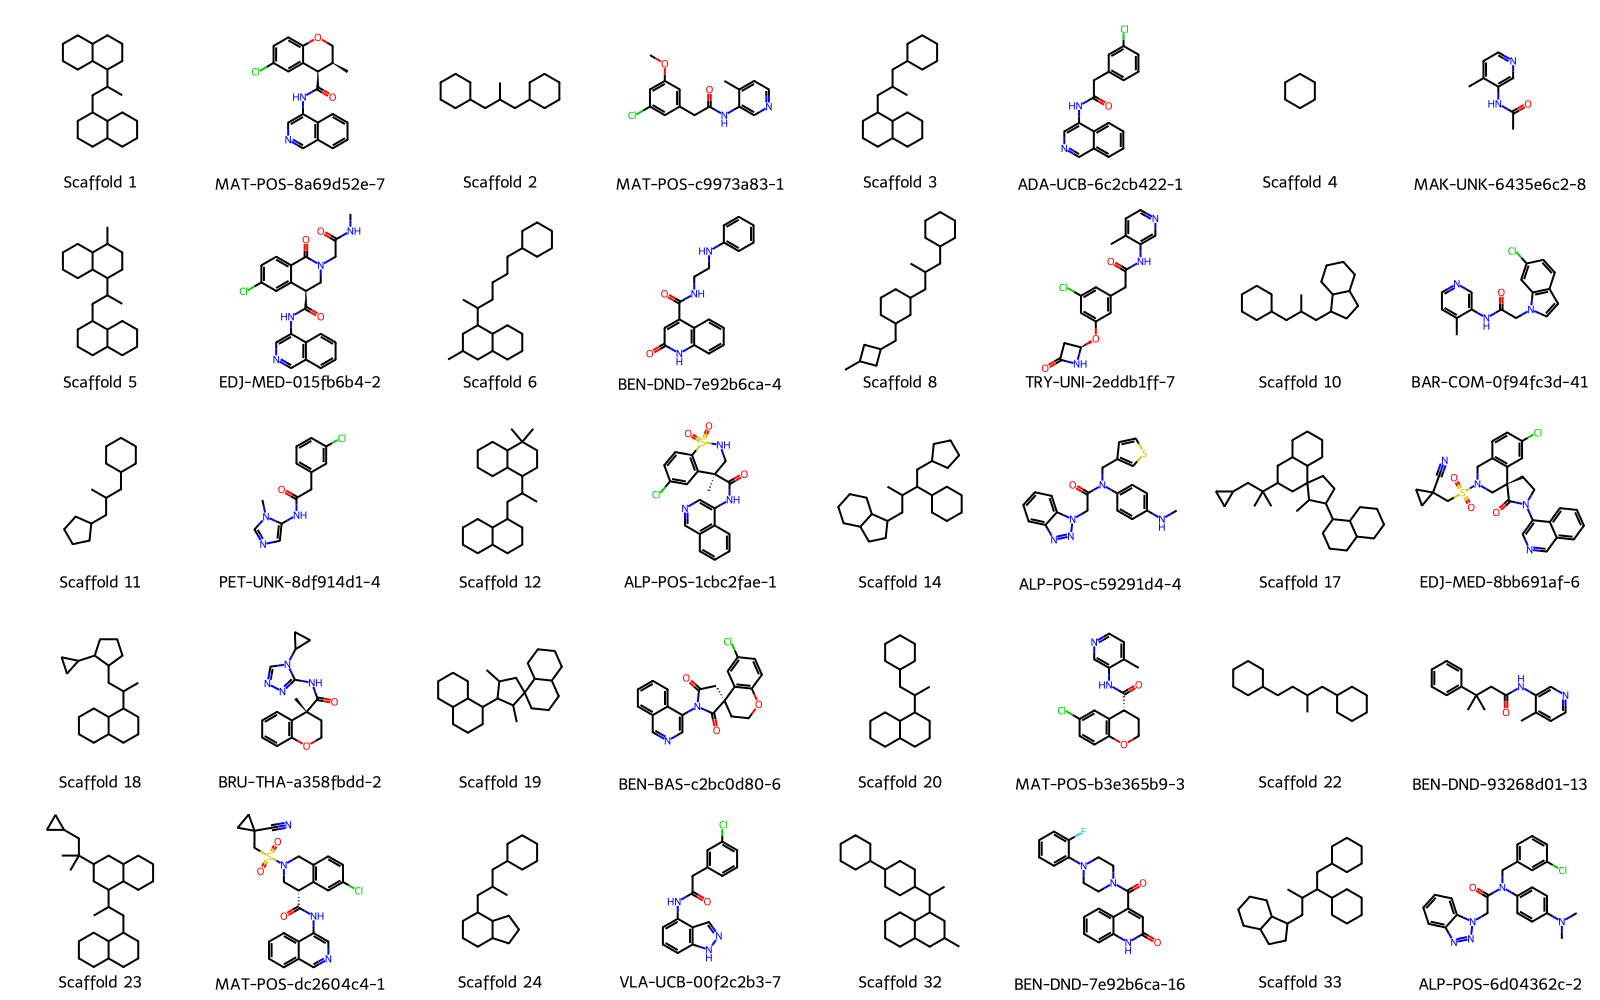

In [312]:
draw_scaffolds(
    scaffold_list,
    example_list=examples,
    first_n=40,
    mols_per_row=4,
    use_svg=False,  # PNG route is simpler for PDF
    save_pdf=True,
    out_file="top20_scaffolds_with_examples.pdf")

In [307]:
wierd_one = examples[-4]

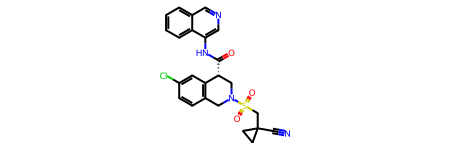

In [308]:
wierd_one[1]

# Make separate figure for just the challenging ones

In [309]:
challenging_scaffolds = [4, 6, 8, 14, 33]

In [313]:
challenging_scaffolds = [s for s in scaffold_list if int(s[0].split()[-1]) in challenging_scaffolds]

In [315]:
challenging_examples = get_example_mols_for_scaffold_list(challenging_scaffolds)

Drawing 10 molecules with 6 per row...


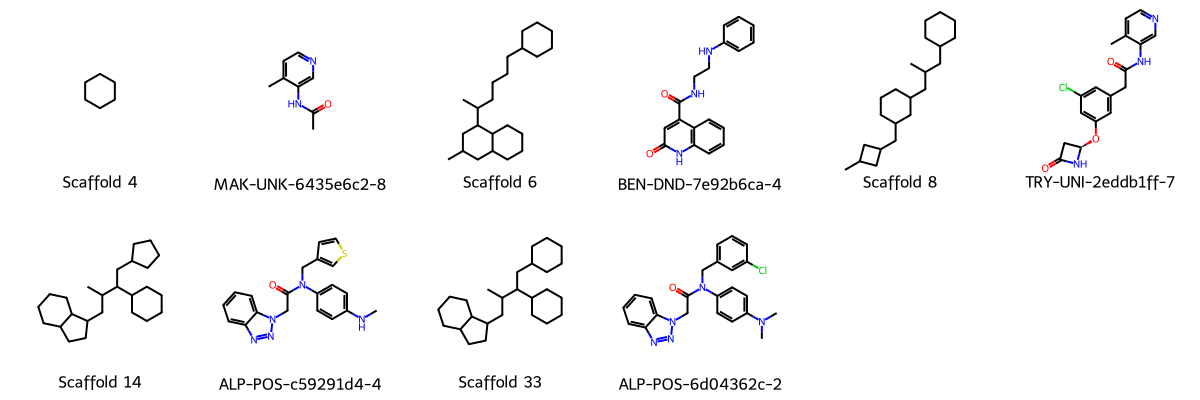

In [320]:
draw_scaffolds(
    challenging_scaffolds,
    example_list=challenging_examples,
    first_n=10,
    mols_per_row=3,
    use_svg=False,  # PNG route is simpler for PDF
    save_pdf=True,
    out_file="challenging_scaffolds_with_examples.pdf",
    vertical_examples=False
)